<a href="https://colab.research.google.com/github/Kaiziferr/statistics/blob/main/statistics/descriptive_statistics/01_workshop_estadistica_descriptiva_datos_no_agrupados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Se requiere crear e interpretar la información de una tabla de frecuencias, basándose en el gráfico que representa las ventas de refrescos.

In [2]:
sns.set(style="darkgrid")

# Venta de refrescos
---

In [3]:
data = pd.DataFrame({'dia':['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'], 'venta_refresco':[25, 14, 59, 37, 10, 28]})
data

,dia,venta_refresco
0,Lunes,25
1,Martes,14
2,Miercoles,59
3,Jueves,37
4,Viernes,10
5,Sabado,28


In [4]:
data2 = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv')
data2

,Unnamed: 0,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,0,0-csves/0.csv,65,TCP,UDP,NaN,18.93900,168.1730,194.28700,7845.126,...,443,80.0,123.0,3.00,7.0,22.00,127.00,255.0,1888.00,0
1,1,0-csves/1.csv,18,UDP,TCP,NaN,0.00000,0.0000,0.00000,0.086,...,443,53.0,53195.0,1.00,1.0,1.00,37.00,47.0,64.00,0
2,2,1-csves/0.csv,10,UDP,NaN,NaN,0.00000,0.0000,0.00000,0.000,...,53,39308.0,54454.0,1.00,1.0,1.00,34.00,43.0,61.75,0
3,3,1-csves/1.csv,2771,UDP,TCP,ICMP6,0.00000,0.0000,0.00000,8548.902,...,53,5355.0,443.0,1.00,1.0,1.00,39.00,49.0,54.00,0
4,4,2-csves/0.csv,2,UDP,NaN,NaN,0.00000,0.0000,0.00000,0.000,...,48871,53.0,NaN,1.00,1.0,1.00,37.00,41.0,45.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,262,76-csves/0.csv,2,TCP,NaN,NaN,2.15850,4.3170,6.47550,8.634,...,3333,52003.0,NaN,1.25,1.5,1.75,328.25,636.5,944.75,5
2833,263,76-csves/1.csv,2,TCP,NaN,NaN,583.36850,583.8100,584.25150,1167.620,...,3333,52003.0,NaN,53.50,55.0,56.50,10108.75,18532.5,26956.25,5
2834,264,76-csves/2.csv,2,TCP,NaN,NaN,288.55375,288.5545,288.55525,577.109,...,3333,52003.0,NaN,22.25,22.5,22.75,3865.00,7165.0,10465.00,5
2835,265,76-csves/3.csv,2,TCP,NaN,NaN,285.37900,285.3790,285.37900,570.758,...,3333,52003.0,NaN,24.75,25.5,26.25,4627.50,8400.0,12172.50,5


In [5]:
sns.set(style="darkgrid")

def plot_bar(data, palette, figsize_x=8,figsize_y=8,fontsize=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  v = kwards
  fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)
  sns.barplot(x=v['ejeX'], y=v['ejey'], data=data, ci=None, ax=ax, palette=palette)
  ax.set_ylabel(v['ejey'], size = 12)
  ax.set_xlabel(v['ejeX'], size=fontsize-3)
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
  for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center") 

In [6]:
palette = {
    'Lunes': '#ff6602ff',
    'Martes': '#0f7175ff',
    'Miercoles': '#c65dc9ff',
    'Jueves': "#a8329b",
    'Viernes': "#1d15bd",
    'Sabado': "#bd4215"
}

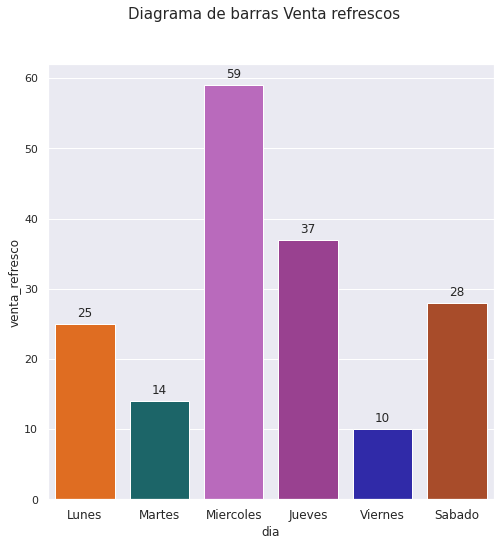

In [7]:
plot_bar(data, palette, ejeX='dia',ejey='venta_refresco',title='Venta refrescos')

# Tabla de frecuencias
---

In [8]:
def table_frecuency_dsicrete(data, category, values):
  table_frecuency = pd.DataFrame()
  table_frecuency['xi'] = data[category].values
  table_frecuency['ni'] = data[values].values
  table_frecuency['fi'] = round(table_frecuency['ni']/data[values].sum(), 3)
  table_frecuency['Ni'] = table_frecuency['ni'].cumsum()
  table_frecuency['Fi'] = round(table_frecuency['fi'].cumsum(), 3)
  temp = pd.Series(table_frecuency['Fi'])
  temp.iloc[-1] = round(temp.iloc[-1] , 0)
  table_frecuency['Fi'] = temp
  return table_frecuency

table_frecuency = table_frecuency_dsicrete(data, 'dia', 'venta_refresco')
table_frecuency

,xi,ni,fi,Ni,Fi
0,Lunes,25,0.145,25,0.145
1,Martes,14,0.081,39,0.226
2,Miercoles,59,0.341,98,0.567
3,Jueves,37,0.214,135,0.781
4,Viernes,10,0.058,145,0.839
5,Sabado,28,0.162,173,1.000


In [9]:
print('Defina la variable en estudio, ¿De qué tipo es y cuál es su escala de medición?')
print('Variable en estudio: Venta de refresco', 'Tipo de variable: Cuantitativa discreta', 'Escala: Razón', sep='\n')

Defina la variable en estudio, ¿De qué tipo es y cuál es su escala de medición?
Variable en estudio: Venta de refresco
Tipo de variable: Cuantitativa discreta
Escala: Razón


In [10]:
print('Qué día se vende menos refrescos?')
print(f"El día que se vende menos refrescos es: {table_frecuency[table_frecuency['ni'] == min(table_frecuency['ni'])]['xi'].values[0]}")

Qué día se vende menos refrescos?
El día que se vende menos refrescos es: Viernes


In [11]:
print('Qué día se vende más refrescos?')
print(f"El día que se vende más refrescos es: {table_frecuency[table_frecuency['ni'] == max(table_frecuency['ni'])]['xi'].values[0]}")

Qué día se vende más refrescos?
El día que se vende más refrescos es: Miercoles


In [12]:
print('Cuántos refrescos se vendieron en toda la semana?')
print(f'En toda la semana se vendieron {table_frecuency["ni"].sum()} refrescos')

Cuántos refrescos se vendieron en toda la semana?
En toda la semana se vendieron 173 refrescos


In [13]:
print('Cuál es el porcentaje que corresponde al día de más ventas?')
print(f"El día más vendido en porcentaje se vendio {table_frecuency[table_frecuency['ni'] == max(table_frecuency['ni'])]['fi'].values[0]} refrescos")

Cuál es el porcentaje que corresponde al día de más ventas?
El día más vendido en porcentaje se vendio 0.341 refrescos


In [14]:
print('Cuál es el porcentaje de ventas del día sábado?')
print(f"El día sabado en porcentaje se vendio {table_frecuency[table_frecuency['xi'] == 'Sabado']['fi'].values[0]} refrescos")

Cuál es el porcentaje de ventas del día sábado?
El día sabado en porcentaje se vendio 0.162 refrescos


In [15]:
print('Cuál es el porcentaje de los días lunes y martes en conjunto?')
print(f'Desde el día lunes a martes en porcentaje se vendio {table_frecuency.iloc[1][-1]} refrescos')

Cuál es el porcentaje de los días lunes y martes en conjunto?
Desde el día lunes a martes en porcentaje se vendio 0.226 refrescos


In [16]:
print('Qué porcentaje de ventas se presentas de lunes a Jueves?')
print(f'Desde el día lunes a jueves en porcentaje se vendio {table_frecuency.iloc[3][-1]} refrescos\n')

Qué porcentaje de ventas se presentas de lunes a Jueves?
Desde el día lunes a jueves en porcentaje se vendio 0.781 refrescos



 Interprete: n1, f4, N3, F2

In [17]:
print('El día martes se vendieron 14 refrescos', 'El dia viernes hubó un 5.8% de las ventas', 
      'Durante la semana de lunes a jueves se vendieron 135 refrescos', 'De lunes a miercoles se hicierón el 56.6% de las ventas durante la semana', sep= '\n')

El día martes se vendieron 14 refrescos
El dia viernes hubó un 5.8% de las ventas
Durante la semana de lunes a jueves se vendieron 135 refrescos
De lunes a miercoles se hicierón el 56.6% de las ventas durante la semana
